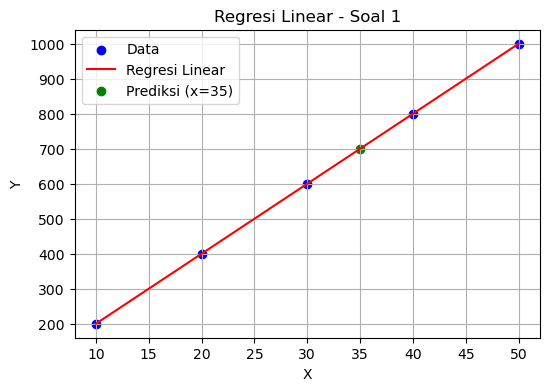

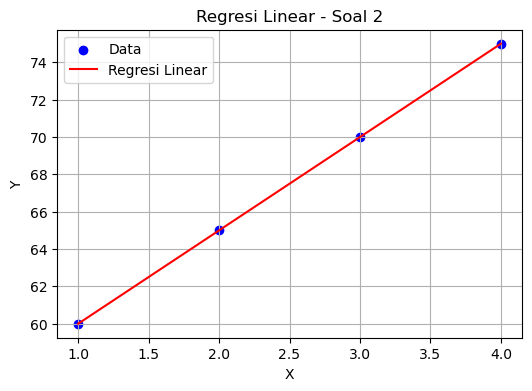

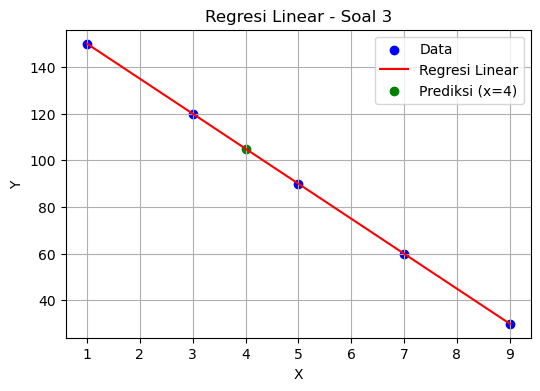

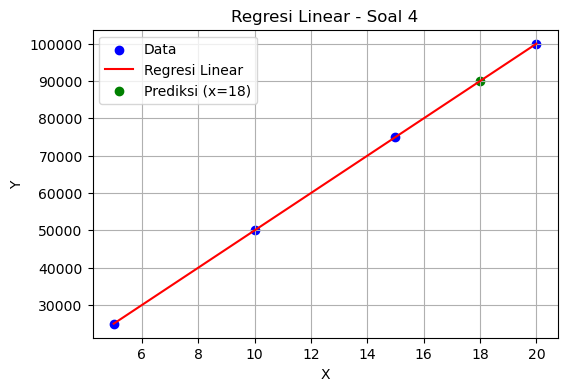


Soal 1
Persamaan: Y = 0.00 + 20.00X
Koefisien Determinasi (R²): 1.0000
Koefisien Korelasi (r): 1.0000
Prediksi untuk X=35: Y = 700.00

Soal 2
Persamaan: Y = 55.00 + 5.00X
Koefisien Determinasi (R²): 1.0000
Koefisien Korelasi (r): 1.0000

Soal 3
Persamaan: Y = 165.00 + -15.00X
Koefisien Determinasi (R²): 1.0000
Koefisien Korelasi (r): -1.0000
Prediksi untuk X=4: Y = 105.00

Soal 4
Persamaan: Y = 0.00 + 5000.00X
Koefisien Determinasi (R²): 1.0000
Koefisien Korelasi (r): 1.0000
Prediksi untuk X=18: Y = 90000.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Dataset untuk masing-masing soal
datasets = [
    # Soal 1: Jumlah Pelanggan vs Pendapatan
    (np.array([10, 20, 30, 40, 50]).reshape(-1, 1), np.array([200, 400, 600, 800, 1000])),
    # Soal 2: Waktu Belajar vs Nilai Ujian
    (np.array([1, 2, 3, 4]).reshape(-1, 1), np.array([60, 65, 70, 75])),
    # Soal 3: Usia Kendaraan vs Harga Jual
    (np.array([1, 3, 5, 7, 9]).reshape(-1, 1), np.array([150, 120, 90, 60, 30])),
    # Soal 4: Jam Internet vs Biaya Pulsa
    (np.array([5, 10, 15, 20]).reshape(-1, 1), np.array([25000, 50000, 75000, 100000]))
]

# Prediksi untuk masing-masing soal
predictions = [35, None, 4, 18]

# Simpan hasil
results = []

for i, (X, y) in enumerate(datasets, 1):
    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]
    intercept = model.intercept_
    y_pred = model.predict(X)
    r_squared = r2_score(y, y_pred)
    r_value = np.corrcoef(X.flatten(), y)[0, 1]  # Korelasi Pearson

    # Prediksi jika ada
    y_new = None
    if predictions[i - 1] is not None:
        x_new = np.array([[predictions[i - 1]]])
        y_new = model.predict(x_new)[0]

    # Visualisasi (opsional)
    plt.figure(figsize=(6, 4))
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_pred, color='red', label='Regresi Linear')
    if y_new is not None:
        plt.scatter(predictions[i - 1], y_new, color='green', label=f'Prediksi (x={predictions[i - 1]})')
    plt.title(f'Regresi Linear - Soal {i}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Simpan hasil numerik
    results.append({
        'soal': i,
        'slope': slope,
        'intercept': intercept,
        'r_squared': r_squared,
        'korelasi_r': r_value,
        'prediksi_x': predictions[i - 1],
        'prediksi_y': y_new
    })

# Tampilkan semua hasil
for r in results:
    print(f"\nSoal {r['soal']}")
    print(f"Persamaan: Y = {r['intercept']:.2f} + {r['slope']:.2f}X")
    print(f"Koefisien Determinasi (R²): {r['r_squared']:.4f}")
    print(f"Koefisien Korelasi (r): {r['korelasi_r']:.4f}")
    if r['prediksi_x'] is not None:
        print(f"Prediksi untuk X={r['prediksi_x']}: Y = {r['prediksi_y']:.2f}")


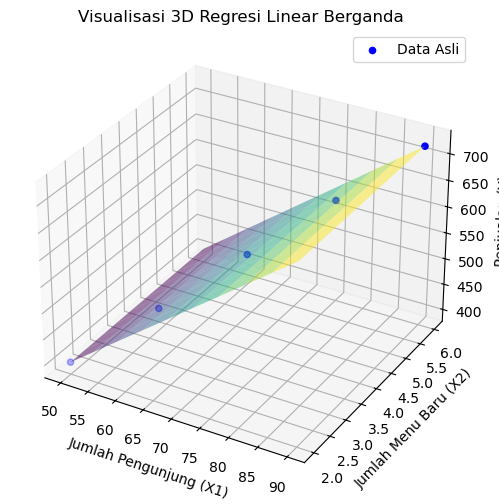

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dataset Soal No. 5
X1 = np.array([50, 60, 70, 80, 90])
X2 = np.array([2, 3, 4, 5, 6])
Y = np.array([400, 480, 560, 640, 720])

# Gabungkan fitur X1 dan X2
X = np.column_stack((X1, X2))

# Model regresi berganda
model = LinearRegression()
model.fit(X, Y)

# Buat meshgrid untuk permukaan
x1_range = np.linspace(50, 90, 10)
x2_range = np.linspace(2, 6, 10)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
x_pred = np.c_[x1_grid.ravel(), x2_grid.ravel()]
y_pred = model.predict(x_pred).reshape(x1_grid.shape)

# Plot 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, color='blue', label='Data Asli')
ax.plot_surface(x1_grid, x2_grid, y_pred, alpha=0.5, cmap='viridis')
ax.set_xlabel('Jumlah Pengunjung (X1)')
ax.set_ylabel('Jumlah Menu Baru (X2)')
ax.set_zlabel('Penjualan (Y)')
ax.set_title('Visualisasi 3D Regresi Linear Berganda')
plt.legend()
plt.show()
